<a href="https://colab.research.google.com/github/JosephBless/Deep-Learning-Colab/blob/main/3_RNN_LSTM_Emotions_%E6%83%85%E6%84%8F%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

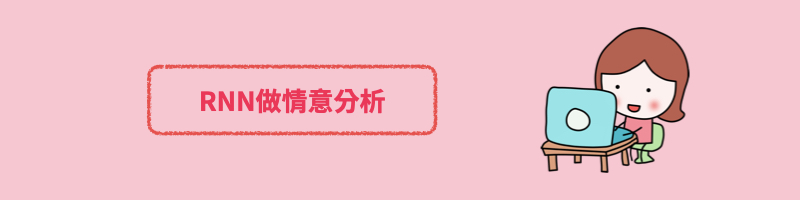

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Import深度學習套件各層的函式庫

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

### 2. 讀入數據

一般NLP自然語言處理, 我們會限制最大要使用的字數，如25000。

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
len(x_train)

25000

In [ ]:
len(x_test)

25000

注意每筆評論的長度當然是不一樣的，列印出訓練資料的長度，即可發現。故需於下一階段限制最大長度及進行補零Padding。

In [ ]:
len(x_train[0])

218

In [ ]:
len(x_train[1])

189

In [ ]:
y_train[0]

1

In [ ]:
y_train[1]

0

### 3. 資料處理 Padding 補零

雖然我們可以做真的 seq2seq, 可是資料長度不一樣對計算上有麻煩, 因此平常還是會固定一定長度, 其餘補 0。

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

### 4. step 01: 打造一個函數學習機

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(10000, 128))

In [ ]:
model.add(LSTM(128))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

#### 組裝

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


### 5. step 02: 訓練

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10,
         validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 22s 24ms/step - loss: 0.4183 - accuracy: 0.8095 - val_loss: 0.3533 - val_accuracy: 0.8436
Epoch 2/10
782/782 [==============================] - 18s 24ms/step - loss: 0.2572 - accuracy: 0.8975 - val_loss: 0.3465 - val_accuracy: 0.8459
Epoch 3/10
782/782 [==============================] - 19s 24ms/step - loss: 0.1825 - accuracy: 0.9292 - val_loss: 0.4315 - val_accuracy: 0.8412
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1317 - accuracy: 0.9512 - val_loss: 0.4378 - val_accuracy: 0.8267
Epoch 5/10
782/782 [==============================] - 19s 24ms/step - loss: 0.0930 - accuracy: 0.9672 - val_loss: 0.6900 - val_accuracy: 0.8292
Epoch 6/10
782/782 [==============================] - 18s 24ms/step - loss: 0.0794 - accuracy: 0.9730 - val_loss: 0.5700 - val_accuracy: 0.8333
Epoch 7/10
782/782 [==============================] - 19s 24ms/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.6798 - val_accuracy:

### 6. step 03: 測試

In [ ]:
from tensorflow.keras.datasets.imdb import get_word_index

In [ ]:
word_index = get_word_index()

In [ ]:
word_index['this']

11

In [ ]:
text = "this movie is worth seeing"

In [ ]:
seq = [word_index[x] for x in text.split()]

In [ ]:
model.predict([seq])

array([[0.98741376]], dtype=float32)

In [ ]:
text = "could of been so much better if properly cast directed and a better script"

In [ ]:
seq = [word_index[x] for x in text.split()]

In [ ]:
model.predict([seq])

array([[0.9204154]], dtype=float32)

### 6. 換個存檔方式

這次是把 model 和訓練權重分開存, 使用上更有彈性。

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model_json = model.to_json()
open('imdb_model_architecture.json', 'w').write(model_json)
model.save_weights('ismdb_model_weights.h5')